# multiclass-prediction 

In [1814]:

import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import sklearn
import keras
from tensorflow.keras.optimizers.legacy import Adam
from scikeras.wrappers import KerasRegressor
from keras.layers import Dropout
from keras.utils import to_categorical
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import tensorflow as tf
import torch
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [1815]:
df_syn = pd.read_csv('synthetic_data.csv')

In [1816]:
df_syn.columns

Index(['Unnamed: 0', 'Kassenr', 'Anteroposterior 1', 'Anteroposterior 2',
       'Vertical 1', 'Vertical 2', 'Transverse', 'Crowding ', 'Spacing',
       'Tooth shape/size\r\n', 'Pan 1', 'Pan 2\r\n', 'Anteroposterior 1.1',
       'Anteroposterior', 'Vertical 1.1', 'Vertical 2.1', 'Transverse.1',
       'Crowding .1', 'Spacing.1', 'Tooth shape/size\r\n.1', 'Pan 1.1',
       'Pan 2\r\n.1', 'Anteroposterior 1.2', 'Anteroposterior 2.1',
       'Vertical 1.2', 'Vertical 2.2', 'Transverse.2', 'Crowding .2',
       'Spacing.2', 'Tooth shape/size\r\n.2', 'Pan 1.2', 'Pan 2\r\n.2',
       'Total Row Score A', 'Total Row Score B', 'Total Row Score C'],
      dtype='object')

In [1817]:
df = pd.read_csv('Data for python.csv', sep=';', header=1, index_col=0, decimal=',')
df
df = df.fillna(0)
df = df.drop(columns=['Id'])
df = df.drop(columns=['ScandcleftID'])
df = df.drop(columns=['Født'])
df = df.drop(columns=['Materialedato A'])
df = df.drop(columns=['Materialedato B'])
df = df.drop(columns=['Materialedato C'])


In [1818]:
def pin_update(row):
    if row["Total Row Score C"] <= 9:
        return 1
    else:
        return 0

In [1819]:
def pin_update1(row):
     if 9 < row["Total Row Score C"] <= 15:
          return 1
     else:
          return 0 

In [1820]:
def pin_update2(row):
    if row["Total Row Score C"] > 15:
        return 1
    return 0 

In [1821]:

#  # create model
# model = Sequential()
# model.add(Dense(32, input_dim=19, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(8,activation='relu'))
# model.add(Dense(3, activation='softmax'))
#  # Compile model
# model.compile(loss='categorical_crossentropy' , optimizer='adam', metrics=['accuracy'])


In [1822]:
def total_row_score(vector):
    vector[7] = sum(vector[0:7])
    vector[15] = sum(vector[8:15])
    print(vector)

In [1823]:
def predic_func(pred):
    if pred[0] > pred[1] and pred[0] > pred[2]:
        return f"the estimate would be class 1 with a probability of {pred[0]*100}"
    elif pred[1] > pred[0] and pred[1] > pred[2]:
        return f"The estimate would be class 2 with a probability of {pred[1]*100}"
    else:
        return f"the estimate would be class 3 with a probability of {pred[2]*100}"

In [1824]:
Output = df.apply(pin_update, axis=1)
Output1 = df.apply(pin_update1, axis=1)
Output2 = df.apply(pin_update2, axis=1)
df['Output'] = Output
df['Output1'] = Output1
df['Output2']  = Output2
df

,Kassenr,Anteroposterior 1,Anteroposterior 2,Vertical 1,Vertical 2,Transverse,Crowding,Spacing,Tooth shape/size\r\n,Pan 1,...,Crowding .2,Spacing.2,Tooth shape/size\r\n.2,Pan 1.2,Pan 2\r\n.2,Total Row Score C,Goslon Score C,Output,Output1,Output2
Center,,,,,,,,,,,,,,,,,,,,,
H,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,1,0,0
H,2,9.0,0.0,0.0,0.0,6.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1.0,1,0,0
H,3,9.0,0.0,0.0,0.0,6.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8,1.0,1,0,0
H,4,0.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9,1.0,1,0,0
H,5,9.0,0.0,1.0,0.0,6.0,4.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,9,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Å,80,9.0,0.0,1.0,0.0,6.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3,1.0,1,0,0
Å,81,9.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4,3.0,1,0,0
Å,82,12.0,0.0,0.0,0.0,6.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12,2.0,0,1,0


In [1825]:
Output = df_syn.apply(pin_update, axis=1)
Output1 = df_syn.apply(pin_update1, axis=1)
Output2 = df_syn.apply(pin_update2, axis=1)
df_syn['Output'] = Output
df_syn['Output1'] = Output1
df_syn['Output2']  = Output2


In [1826]:
df1 = df[["Anteroposterior 1",
          'Anteroposterior 2',
          'Vertical 1',
          'Vertical 2',
          'Transverse',
          'Spacing',
          'Tooth shape/size\r\n',
          "Pan 2\r\n",
          'Total Row Score A',
          'Anteroposterior 1.1',
          'Anteroposterior',
          'Vertical 1.1',
          'Vertical 2.1',
          'Transverse.1',
          'Spacing.1',
          'Tooth shape/size\r\n.1',
          'Pan 2\r\n.1',
          'Total Row Score B',
          'Output',
          'Output1',
          'Output2']]
df1.iloc[1:, :]
df1

,Anteroposterior 1,Anteroposterior 2,Vertical 1,Vertical 2,Transverse,Spacing,Tooth shape/size\r\n,Pan 2\r\n,Total Row Score A,Anteroposterior 1.1,...,Vertical 1.1,Vertical 2.1,Transverse.1,Spacing.1,Tooth shape/size\r\n.1,Pan 2\r\n.1,Total Row Score B,Output,Output1,Output2
Center,,,,,,,,,,,,,,,,,,,,,
H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
H,9.0,0.0,0.0,0.0,6.0,4.0,0.0,4.0,23,0.0,...,0.0,0.0,6.0,4.0,0.0,3.0,13,1,0,0
H,9.0,0.0,0.0,0.0,6.0,1.0,1.0,3.0,21,9.0,...,2.0,4.0,6.0,0.0,1.0,3.0,25,1,0,0
H,0.0,0.0,0.0,0.0,2.0,1.0,0.0,4.0,10,0.0,...,0.0,0.0,6.0,3.0,0.0,0.0,10,1,0,0
H,9.0,0.0,1.0,0.0,6.0,0.0,1.0,4.0,25,9.0,...,2.0,0.0,6.0,0.0,1.0,4.0,26,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Å,9.0,0.0,1.0,0.0,6.0,3.0,0.0,4.0,23,9.0,...,0.0,0.0,6.0,3.0,0.0,3.0,21,1,0,0
Å,9.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,21,12.0,...,3.0,4.0,6.0,0.0,0.0,3.0,32,1,0,0
Å,12.0,0.0,0.0,0.0,6.0,0.0,0.0,4.0,25,9.0,...,0.0,0.0,6.0,0.0,0.0,4.0,23,0,1,0


In [1827]:
df1_syn = df_syn[["Anteroposterior 1",
          'Anteroposterior 2',
          'Vertical 1',
          'Vertical 2',
          'Transverse',
          'Spacing',
          'Tooth shape/size\r\n',
          "Pan 2\r\n",
          'Total Row Score A',
          'Anteroposterior 1.1',
          'Anteroposterior',
          'Vertical 1.1',
          'Vertical 2.1',
          'Transverse.1',
          'Spacing.1',
          'Tooth shape/size\r\n.1',
          'Pan 2\r\n.1',
          'Total Row Score B',
          'Output',
          'Output1',
          'Output2']]
df1_syn.iloc[1:, :]



,Anteroposterior 1,Anteroposterior 2,Vertical 1,Vertical 2,Transverse,Spacing,Tooth shape/size\r\n,Pan 2\r\n,Total Row Score A,Anteroposterior 1.1,...,Vertical 1.1,Vertical 2.1,Transverse.1,Spacing.1,Tooth shape/size\r\n.1,Pan 2\r\n.1,Total Row Score B,Output,Output1,Output2
1,12.0,0.0,0.0,4.0,6.0,0.0,0.0,4.0,30.0,12.0,...,0.0,0.0,0.0,0.0,0.0,4.0,19.0,1,0,0
2,12.0,0.0,0.0,0.0,6.0,0.0,0.0,4.0,25.0,0.0,...,0.0,4.0,6.0,3.0,0.0,4.0,17.0,1,0,0
3,12.0,0.0,0.0,0.0,6.0,0.0,0.0,4.0,24.0,0.0,...,2.0,0.0,8.0,0.0,0.0,3.0,15.0,1,0,0
4,12.0,0.0,3.0,0.0,6.0,0.0,1.0,4.0,26.0,9.0,...,0.0,1.0,6.0,0.0,0.0,4.0,24.0,1,0,0
5,12.0,0.0,0.0,3.0,8.0,0.0,0.0,4.0,27.0,0.0,...,0.0,0.0,6.0,0.0,1.0,3.0,14.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17805,12.0,0.0,2.0,0.0,6.0,0.0,1.0,4.0,29.0,12.0,...,1.0,0.0,6.0,0.0,0.0,4.0,26.0,1,0,0
17806,12.0,0.0,2.0,0.0,6.0,0.0,1.0,4.0,28.0,12.0,...,0.0,0.0,6.0,0.0,1.0,3.0,25.0,1,0,0
17807,12.0,0.0,2.0,0.0,6.0,0.0,0.0,4.0,28.0,12.0,...,0.0,4.0,6.0,0.0,0.0,0.0,25.0,1,0,0
17808,12.0,0.0,2.0,0.0,6.0,0.0,1.0,4.0,26.0,0.0,...,0.0,4.0,6.0,0.0,0.0,4.0,17.0,1,0,0


In [1828]:


target_column = ["Output",'Output1','Output2']
numerical_column = df1.columns.drop(target_column)
output_rows = df1[target_column]
df1.drop(target_column,axis=1,inplace=True)

scaler = MinMaxScaler()
scaler.fit(df1)
df1 = scaler.transform(df1)

/var/folders/d5/qsvd0xbs3610vyxc_s5y8cv80000gn/T/ipykernel_67858/2750786257.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(target_column,axis=1,inplace=True)


In [1829]:

target_column = ["Output",'Output1','Output2']
numerical_column = df1_syn.columns.drop(target_column)
output_rows_syn = df1_syn[target_column]
df1_syn.drop(target_column,axis=1,inplace=True)

scaler = MinMaxScaler()
scaler.fit(df1_syn)
df1_syn = scaler.transform(df1_syn)

/var/folders/d5/qsvd0xbs3610vyxc_s5y8cv80000gn/T/ipykernel_67858/3861707241.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_syn.drop(target_column,axis=1,inplace=True)


In [1830]:
X_train, X_test, y_train, y_test = train_test_split(df1, output_rows, test_size=0.25,shuffle=True)
X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(df1_syn, output_rows_syn, test_size=0.25,shuffle=True)


In [1831]:
no_classes= 3
no_epochs = 10
optimizer = Adam()
verbosity = 1
num_folds = 5
batch_size = 64
acc_per_fold = []
loss_per_fold = []
fold_no = 1

In [1832]:
inputs = np.concatenate((X_train_syn, X_test_syn), axis=0)
targets = np.concatenate((y_train_syn, y_test_syn), axis=0)

kfold = KFold(n_splits=num_folds, shuffle=True)

In [1833]:
for train, test in kfold.split(inputs, targets):
    model = Sequential()
    model.add(Dense(128, input_dim=18, activation='relu'))
    #model.add(Dropout(0.3))
    #model.add(Dense(128, activation='relu'))
    #model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu'))
    #model.add(Dropout(0.4))
    model.add(Dense(16,activation='relu'))
    #model.add(Dropout(0.4))
    model.add(Dense(8,activation='relu'))
    #model.add(Dropout(0.4))
    model.add(Dense(3, activation='softmax'))
 # Compile model
    model.compile(loss='categorical_crossentropy' , optimizer='adam', metrics=['accuracy'])

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

  # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

  # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] *100)
    loss_per_fold.append(scores[0])

  # Increase fold number
    fold_no = fold_no + 1
    

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10


223/223 [==============================] - 25s 96ms/step - loss: 0.5585 - accuracy: 0.8230
Epoch 2/10
223/223 [==============================] - 19s 85ms/step - loss: 0.5239 - accuracy: 0.8353
Epoch 3/10
223/223 [==============================] - 19s 83ms/step - loss: 0.5235 - accuracy: 0.8351
Epoch 4/10
223/223 [==============================] - 17s 78ms/step - loss: 0.5205 - accuracy: 0.8353
Epoch 5/10
223/223 [==============================] - 18s 79ms/step - loss: 0.5209 - accuracy: 0.8353
Epoch 6/10
223/223 [==============================] - 18s 79ms/step - loss: 0.5233 - accuracy: 0.8348
Epoch 7/10
223/223 [==============================] - 18s 80ms/step - loss: 0.5389 - accuracy: 0.8323
Epoch 8/10
 49/223 [=====>........................] - ETA: 13s - loss: 0.6425 - accuracy: 0.7988

In [ ]:
y_test.Output
tensor = torch.tensor(y_test.values)
tensor.shape
predicted = model.predict(X_test)

1/1 [==============================] - 0s 212ms/step


tf.Tensor(
[[0.35644597 0.39633352 0.2472205 ]
 [0.34494978 0.390299   0.2647512 ]
 [0.3379118  0.39619163 0.2658966 ]
 [0.42432392 0.30817464 0.26750147]
 [0.4007404  0.33234587 0.26691374]
 [0.4112935  0.3355903  0.25311616]
 [0.35222596 0.35132837 0.29644564]
 [0.4348996  0.3341985  0.23090184]
 [0.42746228 0.32644215 0.24609558]
 [0.48515773 0.2766711  0.23817115]
 [0.46320382 0.287885   0.2489112 ]
 [0.32756576 0.41262886 0.25980532]
 [0.55081844 0.23035297 0.21882853]
 [0.39597073 0.34899    0.25503936]
 [0.34482953 0.35936126 0.2958092 ]
 [0.37521154 0.28204137 0.3427471 ]
 [0.42130846 0.35073498 0.22795656]
 [0.31371167 0.4039024  0.2823859 ]
 [0.40251634 0.32952175 0.2679619 ]
 [0.39377964 0.3332909  0.27292946]
 [0.37513804 0.37592238 0.2489396 ]
 [0.45520678 0.26843768 0.27635556]
 [0.41564834 0.31324714 0.27110445]
 [0.35290504 0.38222015 0.26487485]
 [0.4800744  0.24593678 0.27398878]
 [0.43398452 0.2668143  0.29920122]
 [0.4083994  0.3260526  0.265548  ]
 [0.4456871  0.30

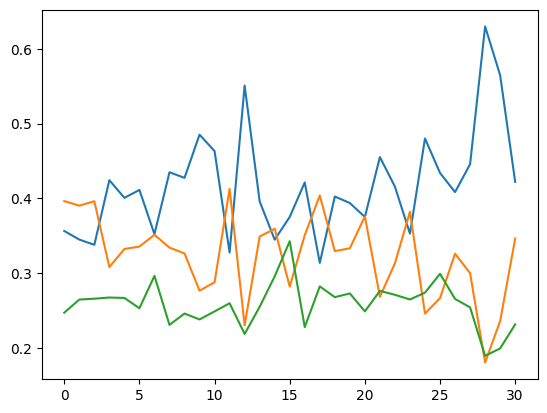

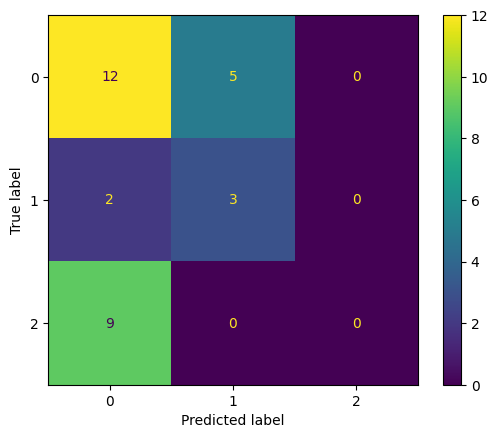

In [ ]:
predict = tf.squeeze(predicted)
plt.plot(predict)
print(predict)
predic= np.array([np.argmax(row) for row in predicted])
actual = np.array([np.argmax(row) for row in tensor])
conf_mat = confusion_matrix(actual, predic)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [ ]:

"Anteroposterior 1",'Anteroposterior 2','Vertical 1','Vertical 2','Transverse','Spacing','Pan 1','Total Row Score A','Goslon Score A'

          
'Anteroposterior 1.1','Anteroposterior 2.1','Vertical 1.1', 'Vertical 2.1', 'Transverse.1', 'Spacing.1', 'Pan 1.1', 'Total Row Score B', 'Goslon Score B'

xnew = np.array([[9, 0, 3, 0, 6,1, 4 ,4, 26],
                 [12, 0, 2, 3, 8,1, 4, 3, 32]])

scaler.fit(xnew)
xnew = scaler.transform(xnew)

#total_row_score(xnew)
xnew

array([[0., 0., 1., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 1., 1., 0., 0., 0., 1.]])

In [ ]:
new_prediction = model.predict(xnew.reshape(1,18))
new_prediction = tf.squeeze(new_prediction)

print(new_prediction)

1/1 [==============================] - 0s 154ms/step
tf.Tensor([0.29282188 0.35015023 0.3570279 ], shape=(3,), dtype=float32)


In [ ]:

print(predic_func(new_prediction))

the estimate would be class 3 with a probability of 35.702789306640625


In [ ]:
from sklearn import svm 

clf = svm.SVC()
clf.fit(X_train, y_train.Output)
clf.predict(X_test)
clf.score(X_test, y_test.Output)


0.5483870967741935

In [ ]:
xnewnew = [9, 0, 3, 0, 6,1, 4 ,4, 26,12, 0, 2, 3, 8,1, 4, 3, 32]
xnewnew

[9, 0, 3, 0, 6, 1, 4, 4, 26, 12, 0, 2, 3, 8, 1, 4, 3, 32]

In [ ]:
clf.predict([xnewnew])

array([1])